## Imports

In [13]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

## Perceptron

* https://medium.com/@stanleydukor/neural-representation-of-and-or-not-xor-and-xnor-logic-gates-perceptron-algorithm-b0275375fea1
* Preceptron equation: 
  * Wx+b > 0 => Prediction = 1
  * Wx+b <=0 => Prediction = 0
* 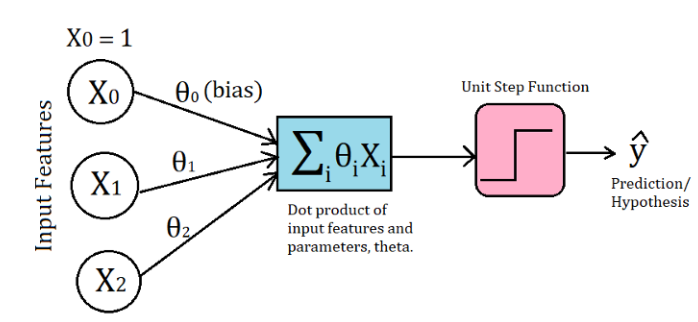

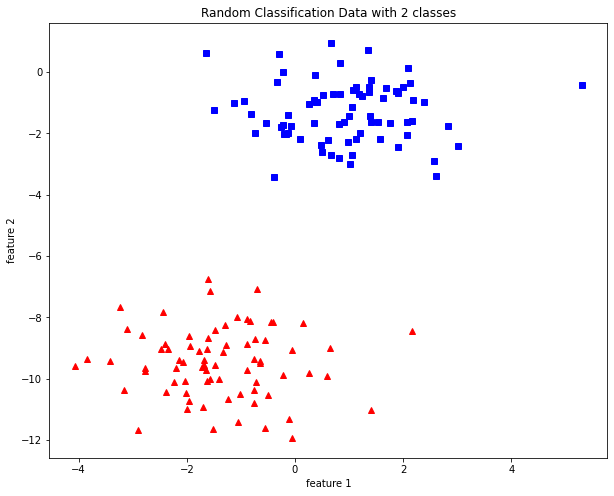

In [12]:
X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=2)
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')
plt.show()

In [6]:
def step_func(z):
    return 1.0 if (z > 0) else 0.0

In [10]:
# X --> Inputs.
# y --> labels/target.
# lr --> learning rate.
# epochs --> Number of iterations.
# m-> number of training examples
# n-> number of features 
m, n = X.shape
m,n

(150, 2)

In [35]:
# Initializing parapeters(theta) to zeros.
# +1 in n+1 for the bias term.
theta = np.zeros((n+1,1))
theta

array([[0.],
       [0.],
       [0.]])

In [36]:
idx = 0
x_i = X[idx]
print(f"x:{x_i}")
x_i = np.insert(x_i, 0, 1).reshape(-1,1)
print(f"x with bias:{x_i}")

x:[-0.53278301 -1.64847081]
x with bias:[[ 1.        ]
 [-0.53278301]
 [-1.64847081]]


In [37]:
# Calculating prediction/hypothesis.
y_hat = step_func(np.dot(x_i.T, theta))
y_hat

0.0

In [38]:
# Updating if the example is misclassified.
y_hat - y[idx] != 0

True

In [39]:
(y[idx] - y_hat) * x_i

array([[ 1.        ],
       [-0.53278301],
       [-1.64847081]])

In [40]:
theta += 1*((y[idx] - y_hat)*x_i)
theta

array([[ 1.        ],
       [-0.53278301],
       [-1.64847081]])

In [ ]:
def perceptron(X, y, lr, epochs):
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing parapeters(theta) to zeros.
    # +1 in n+1 for the bias term.
    theta = np.zeros((n+1,1))
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, theta))
            
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)
                
                # Incrementing by 1.
                n_miss += 1
        
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
        
    return theta, n_miss_list